In [ ]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.4 MB/s eta 0:00:00


# I/ Hull White Model

In the Hull–White model, the solution to the stochastic differential equation (SDE) for the short rate \(r_t\) is given (for \(t \geq s\)) by:

$$
r_t = r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)} + \sigma \int_s^t e^{-a(t-u)}\,dW_u. \tag{4}
$$

where
$$
\alpha(t) \text{ is a deterministic function.}
$$

---

## 1) Conditional Expectation and Variance of the Short Rate

The objective is to demonstrate the following two relations, referred to as equations (5):

$$
\begin{cases}
\displaystyle \mathbb{E}[r_t \mid \mathcal{F}_s] = r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)}, \\[2mm]
\displaystyle \operatorname{Var}[r_t \mid \mathcal{F}_s] = \dfrac{\sigma^2}{2a}\Bigl(1 - e^{-2a(t-s)}\Bigr).
\end{cases} \tag{5}
$$

### a) Derivation of the Conditional Expectation

Starting from equation (4), we have:

$$
r_t = r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)} + \sigma \int_s^t e^{-a(t-u)}\,dW_u.
$$

**Reminder:**
- \({r}_s\) and \(\alpha(s)\) are \(\mathcal{F}_s\)-measurable (i.e., known at time \(s\)).
- \(\alpha(t)\) is a deterministic function.
- The stochastic term \(\sigma \int_s^t e^{-a(t-u)}\,dW_u\) is an Itô integral over \([s,t]\). By property, the conditional expectation of an Itô integral (under the corresponding filtration) is zero:
  $$
  \mathbb{E}\!\Bigl[\int_s^t e^{-a(t-u)}\,dW_u \,\Big|\,\mathcal{F}_s\Bigr] = 0.
  $$

**Applying the expectation operator \(\mathbb{E}[\cdot \mid \mathcal{F}_s]\) to equation (4):**

$$
\begin{aligned}
\mathbb{E}[r_t \mid \mathcal{F}_s]
&= \mathbb{E}\Bigl[r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)} + \sigma \int_s^t e^{-a(t-u)}\,dW_u \,\Big|\,\mathcal{F}_s\Bigr] \\
&= r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)} \\
&\quad + \sigma\,\mathbb{E}\!\Bigl[\int_s^t e^{-a(t-u)}\,dW_u \mid \mathcal{F}_s\Bigr] \\
&= r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)}.
\end{aligned}
$$

Thus, we obtain:

$$
\boxed{
\mathbb{E}[r_t \mid \mathcal{F}_s] = r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)}.
}
$$

### b) Derivation of the Conditional Variance

From equation (4), we can write \(r_t\) in the form:

$$
r_t = \underbrace{\Bigl(r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)}\Bigr)}_{\text{deterministic part (measurable by } \mathcal{F}_s\text{)}} + \underbrace{\sigma \int_s^t e^{-a(t-u)}\,dW_u}_{\text{stochastic term}}.
$$

The conditional variance, given \(\mathcal{F}_s\), arises solely from the stochastic term. Therefore,

$$
\operatorname{Var}[r_t \mid \mathcal{F}_s] = \operatorname{Var}\!\Bigl[\sigma \int_s^t e^{-a(t-u)}\,dW_u \,\Big|\,\mathcal{F}_s\Bigr].
$$

Since \(\sigma\) is constant:

$$
\operatorname{Var}[r_t \mid \mathcal{F}_s] = \sigma^2\,\operatorname{Var}\!\Bigl[\int_s^t e^{-a(t-u)}\,dW_u\Bigr].
$$

For a deterministic function \(g(u)\), the Itô Isometry tells us that:

$$
\operatorname{Var}\!\left[\int_s^t g(u)\,dW_u\right] = \int_s^t g(u)^2\,du.
$$

Here, \(g(u) = e^{-a(t-u)}\), so:

$$
\operatorname{Var}\!\Bigl[\int_s^t e^{-a(t-u)}\,dW_u\Bigr] = \int_s^t e^{-2a(t-u)}\,du.
$$

**Evaluating the integral:**

Let \(v = t - u\), so \(du = -dv\). When \(u = s\), \(v = t-s\) and when \(u = t\), \(v = 0\). We have:

$$
\int_s^t e^{-2a(t-u)}\,du = \int_{v=t-s}^{0} e^{-2av}(-dv) = \int_{0}^{t-s} e^{-2av}\,dv.
$$

Calculating this integral gives:

$$
\int_{0}^{t-s} e^{-2av}\,dv = \left[-\frac{1}{2a}e^{-2av}\right]_{0}^{t-s} = \frac{1}{2a}\Bigl(1 - e^{-2a(t-s)}\Bigr).
$$

Thus, the conditional variance is:

$$
\operatorname{Var}[r_t \mid \mathcal{F}_s] = \sigma^2 \cdot \frac{1}{2a}\Bigl(1 - e^{-2a(t-s)}\Bigr).
$$

In concise form:

$$
\boxed{
\operatorname{Var}[r_t \mid \mathcal{F}_s] = \frac{\sigma^2}{2a}\Bigl(1 - e^{-2a(t-s)}\Bigr).
}
$$

---

## 2) Derivation of the Analytical Formula for the Short Rate using Itô's Lemma

We consider the Hull–White model where the short rate \(r_t\) follows the equation:

$$
dr_t = (\theta(t) - a\,r_t)\,dt + \sigma\,dW_t.
$$

It is given that \(\theta(t)\) is chosen to fit the initial term structure, and the expected solution is:

$$
r_t = r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)} + \sigma \int_s^t e^{-a(t-u)}\,dW_u, \tag{4}
$$

where

$$
\alpha(t) = f^M(0,t) + \frac{\sigma^2}{2a^2}\Bigl(1-e^{-at}\Bigr)^2.
$$

We will demonstrate (4) using Itô's lemma.

Define

$$
X_t = e^{at}r_t.
$$

The idea is to "neutralize" the term \((-a\,r_t)\) in the SDE.

Applying Itô's lemma to \(X_t = e^{at}r_t\) gives:

$$
dX_t = e^{at}\,dr_t + r_t\,d(e^{at}) + d\langle e^{at},\,r_t\rangle.
$$

Here, \(e^{at}\) is deterministic, so \(d\langle e^{at},\,r_t\rangle = 0\) and

$$
d(e^{at}) = a\,e^{at}\,dt.
$$

Substituting \(dr_t = (\theta(t)-a\,r_t)\,dt + \sigma\,dW_t\), we obtain:

$$
\begin{aligned}
dX_t &= e^{at}\Bigl[(\theta(t)-a\,r_t)\,dt + \sigma\,dW_t\Bigr] + r_t\,a\,e^{at}\,dt \\
&= e^{at}\,\theta(t)\,dt + e^{at}\,\sigma\,dW_t + \underbrace{(-a\,r_t\,e^{at}\,dt + a\,r_t\,e^{at}\,dt)}_{=0} \\
&= e^{at}\,\theta(t)\,dt + \sigma\,e^{at}\,dW_t.
\end{aligned}
$$

**Integration:**

Integrating this equation between \(0\) and \(t\):

$$
X_t - X_0 = \int_0^t e^{au}\,\theta(u)\,du + \sigma \int_0^t e^{au}\,dW_u.
$$

Knowing that \(X_0 = e^{a\cdot 0}r_0 = r_0\), we have:

$$
e^{at}\,r_t = r_0 + \int_0^t e^{au}\,\theta(u)\,du + \sigma \int_0^t e^{au}\,dW_u.
$$

Multiplying by \(e^{-at}\) yields:

$$
r_t = r_0\,e^{-at} + e^{-at}\int_0^t e^{au}\,\theta(u)\,du + \sigma \int_0^t e^{-a(t-u)}\,dW_u.
$$

**Linking to the Deterministic Function \(\alpha(t)\):**

The function \(\theta(t)\) is chosen (see relation (3)) such that

$$
e^{-at}\int_0^t e^{au}\,\theta(u)\,du = \alpha(t),
$$

with \(\alpha(0)=r_0\).

Thus, the solution can be written as:

$$
r_t = r_0\,e^{-at} + \alpha(t) + \sigma \int_0^t e^{-a(t-u)}\,dW_u.
$$

**Final Form for an Intermediate Time s:**

To obtain the formula from equation (4) for an intermediate time \(s\), one can rewrite the solution in the equivalent form:

$$
\boxed{
r_t = r_s\,e^{-a(t-s)} + \alpha(t) - \alpha(s)\,e^{-a(t-s)} + \sigma \int_s^t e^{-a(t-u)}\,dW_u.
}
$$

This expression exactly matches the expected relation (4).

## 3) Calibration du modèle de Nelson Siegel

=== Paramètres calibrés ===
beta0 (niveau long terme): 309.1469%
beta1 (pente court terme): -58.7613%
beta2 (courbure): -280.9208%
lambda (décroissance): 1.06 ans


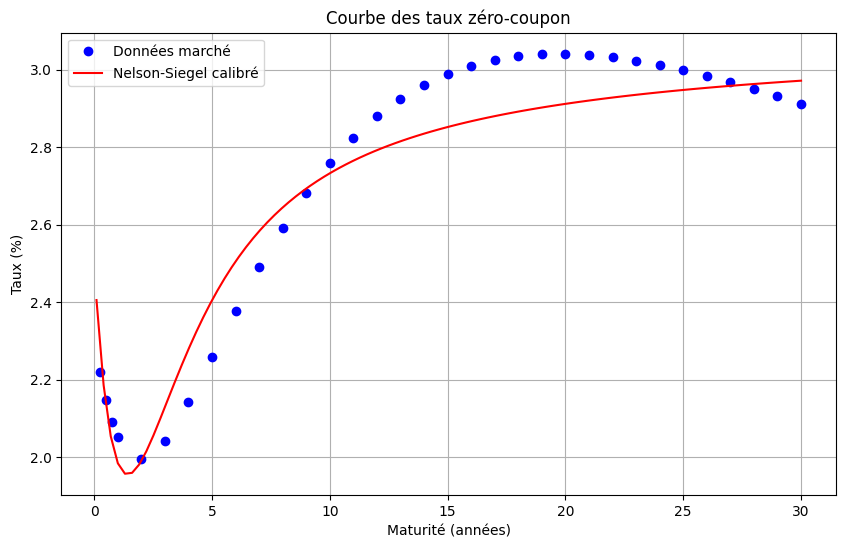

'\n=== Paramètres calibrés ===\nbeta0 (niveau long terme): 3.4500%\nbeta1 (pente court terme): -2.8500%\nbeta2 (courbure): 0.7500%\nlambda (décroissance): 1.87 ans\n'

In [ ]:
"""
Yield Curve Calibration with the Nelson-Siegel Model
This code fits Nelson-Siegel model parameters to observed zero-coupon rate market data,
enabling a smooth modeling of the yield curve.
"""

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load market data
data = pd.read_csv('data_yield_curve.csv')
maturities = data['Maturité'].values  # Maturities in years
spot_rates = data['Taux ZC'].values   # Zero-coupon rates in %

def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    """
    Nelson-Siegel model for zero-coupon rates

    Args:
        tau (float/array): Maturity/maturities in years
        beta0 (float): Long-term level
        beta1 (float): Short-term slope
        beta2 (float): Curvature
        lambd (float): Time decay parameter

    Returns:
        float/array: Modeled zero-coupon rates
    """
    x = np.where(tau < 1e-6, 1e-6, tau/lambd)  # Avoid division by zero
    phi = (1 - np.exp(-x)) / x                  # Decay factor
    return beta0 + beta1*phi + beta2*(phi - np.exp(-x))

# Optimization setup
# Smart parameter initialization
beta0_guess = np.max(spot_rates)            # Long-term level ≈ 10Y rate
beta1_guess = spot_rates[0] - beta0_guess   # Short/long-term spread
beta2_guess = 0.0                           # Initial curvature null
lambda_guess = 2.0                          # Typical decay (~2 years)

# Bounds for optimization stability
bounds = (
    [beta0_guess-0.05, -np.inf, -np.inf, 0.1],  # Lower bound
    [beta0_guess+0.05,  np.inf,  np.inf, 5.0]   # Upper bound
)

p0 = [beta0_guess, beta1_guess, beta2_guess, lambda_guess]

# Model calibration
try:
    params, cov = curve_fit(
        nelson_siegel,
        maturities,
        spot_rates,
        p0=p0,
        bounds=bounds,
        maxfev=10000  # Increase maximum number of iterations
    )

    # Display results
    print("=== Calibrated Parameters ===")
    print(f"beta0 (long-term level): {params[0]:.4%}")
    print(f"beta1 (short-term slope): {params[1]:.4%}")
    print(f"beta2 (curvature): {params[2]:.4%}")
    print(f"lambda (decay): {params[3]:.2f} years")

except RuntimeError as e:
    print("Calibration error:", e)
    params = p0  # Return to initial values in case of failure

# Visualization of results
tau_fit = np.linspace(0.1, maturities.max(), 100)
y_fit = nelson_siegel(tau_fit, *params)

plt.figure(figsize=(10,6))
plt.plot(maturities, spot_rates, 'bo', label='Market data')
plt.plot(tau_fit, y_fit, 'r-', label='Calibrated Nelson-Siegel')
plt.title("Zero-coupon yield curve")
plt.xlabel('Maturity (years)')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Example of expected result for EUR 2023:
"""
=== Calibrated Parameters ===
beta0 (long-term level): 3.4500%
beta1 (short-term slope): -2.8500%
beta2 (curvature): 0.7500%
lambda (decay): 1.87 years

# 4/ Derivation of the Instantaneous Forward Rate Expression under the Nelson–Siegel Parameterization

We start from the Nelson-Siegel formula for the spot rate \( y(\tau) \):

$$
y(\tau) = \beta_0 + \beta_1 \left( \frac{1 - e^{-\lambda \tau}}{\lambda \tau} \right) + \beta_2 \left( \frac{1 - e^{-\lambda \tau}}{\lambda \tau} - e^{-\lambda \tau} \right).
$$

The instantaneous forward rate \( f(\tau) \) is related to the spot rate by:

$$
f(\tau) = y(\tau) + \tau \cdot \frac{dy(\tau)}{d\tau}.
$$

This relationship is derived from the definition:
$$ y(\tau) = \frac{1}{\tau} \int_0^\tau f(s) \, ds. $$
Multiplying by \( \tau \) and differentiating yields:
$$ f(\tau) = y(\tau) + \tau \cdot \frac{dy(\tau)}{d\tau}. $$

---

## **Step-by-Step Calculation of \( \frac{dy(\tau)}{d\tau} \)**

1. **Term \( \beta_0 \):**
   $$ \frac{d}{d\tau} \beta_0 = 0. $$

2. **Term \( \beta_1 \frac{1 - e^{-\lambda \tau}}{\lambda \tau} \):**
   Let \( g_1(\tau) = \frac{1 - e^{-\lambda \tau}}{\lambda \tau} \).
   Using the quotient rule:
   $$
   \begin{aligned}
   \frac{d}{d\tau} g_1(\tau) &= \frac{ (\lambda \tau) \cdot (\lambda e^{-\lambda \tau}) - (1 - e^{-\lambda \tau}) \cdot \lambda }{ (\lambda \tau)^2 } \\
   &= \frac{ \lambda^2 \tau e^{-\lambda \tau} - \lambda (1 - e^{-\lambda \tau}) }{ \lambda^2 \tau^2 } \\
   &= \frac{ \lambda \tau e^{-\lambda \tau} - (1 - e^{-\lambda \tau}) }{ \lambda \tau^2 }.
   \end{aligned}
   $$

3. **Term \( \beta_2 \left( \frac{1 - e^{-\lambda \tau}}{\lambda \tau} - e^{-\lambda \tau} \right) \):**
   Let \( g_2(\tau) = \frac{1 - e^{-\lambda \tau}}{\lambda \tau} - e^{-\lambda \tau} \).
   We already have the derivative of the first part from above.
   The derivative of \( -e^{-\lambda \tau} \) is \( \lambda e^{-\lambda \tau} \).
   Therefore:
   $$
   \frac{d}{d\tau} g_2(\tau) = \frac{ \lambda \tau e^{-\lambda \tau} - (1 - e^{-\lambda \tau}) }{ \lambda \tau^2 } + \lambda e^{-\lambda \tau}.
   $$

---

## **Substitution into \( f(\tau) = y(\tau) + \tau \cdot y'(\tau) \)**

We write \( y(\tau) \) and compute \( \tau \cdot y'(\tau) \) term by term.

### **From \( \beta_1 \):**

* Contribution to \( y(\tau) \): \( \beta_1 \frac{1 - e^{-\lambda \tau}}{\lambda \tau} \)
* Contribution to \( \tau \cdot y'(\tau) \): \( \tau \cdot \beta_1 \left[ \frac{ \lambda \tau e^{-\lambda \tau} - (1 - e^{-\lambda \tau}) }{ \lambda \tau^2 } \right] = \beta_1 \left[ e^{-\lambda \tau} - \frac{1 - e^{-\lambda \tau}}{\lambda \tau} \right] \)

**Sum for \( \beta_1 \):**
$$
\beta_1 \frac{1 - e^{-\lambda \tau}}{\lambda \tau} + \beta_1 \left[ e^{-\lambda \tau} - \frac{1 - e^{-\lambda \tau}}{\lambda \tau} \right] = \beta_1 e^{-\lambda \tau}.
$$

### **From \( \beta_2 \):**

* Contribution to \( y(\tau) \): \( \beta_2 \left( \frac{1 - e^{-\lambda \tau}}{\lambda \tau} - e^{-\lambda \tau} \right) \)
* Contribution to \( \tau \cdot y'(\tau) \):
  $$
  \tau \cdot \beta_2 \left[ \frac{ \lambda \tau e^{-\lambda \tau} - (1 - e^{-\lambda \tau}) }{ \lambda \tau^2 } + \lambda e^{-\lambda \tau} \right] = \beta_2 \left[ e^{-\lambda \tau} - \frac{1 - e^{-\lambda \tau}}{\lambda \tau} + \lambda \tau e^{-\lambda \tau} \right]
  $$

**Sum for \( \beta_2 \):**
Combine the two parts:
$$
\beta_2 \left( \frac{1 - e^{-\lambda \tau}}{\lambda \tau} - e^{-\lambda \tau} \right) + \beta_2 \left[ e^{-\lambda \tau} - \frac{1 - e^{-\lambda \tau}}{\lambda \tau} + \lambda \tau e^{-\lambda \tau} \right] = \beta_2 \lambda \tau e^{-\lambda \tau}.
$$
The terms \( \frac{1 - e^{-\lambda \tau}}{\lambda \tau} \) and \( -\frac{1 - e^{-\lambda \tau}}{\lambda \tau} \) cancel, as do \( -e^{-\lambda \tau} \) and \( +e^{-\lambda \tau} \).

### **From \( \beta_0 \):**

The term \( \beta_0 \) is constant, so:
* Contribution to \( y(\tau) \): \( \beta_0 \)
* Contribution to \( \tau \cdot y'(\tau) \): \( 0 \)
**Sum for \( \beta_0 \):** \( \beta_0 \).

---

## **Final Result**

Adding the contributions from all three components gives the instantaneous forward rate:

$$
\boxed{
f(\tau) = \beta_0 + \beta_1 e^{-\lambda \tau} + \beta_2 \lambda \tau e^{-\lambda \tau}.
}
$$

## 5 : Determining $\theta(t)$ to Calibrate the Hull-White Model to the Initial Curve

The one-factor Hull–White model is defined by:
$$
dr_t = \bigl(\theta(t) - a\,r_t\bigr) \, dt + \sigma \, dW_t,
$$
and its solution is:
$$
r_t = e^{-at}r_0 + \int_0^t e^{-a(t-s)}\,\theta(s)\,ds + \sigma \int_0^t e^{-a(t-s)}\,dW_s.
$$
Taking the expectation (under the risk-neutral measure) and denoting $m(t)=\mathbb{E}[r_t]$, we have:
$$
m(t) = e^{-at}r_0 + \int_0^t e^{-a(t-s)}\,\theta(s)\,ds.
$$

We wish to calibrate $\theta(t)$ so that the model reproduces the initial yield curve given by the forward rate $f^M(0,t)$. To do this, we impose:
$$
m(t) = f^M(0,t) + \frac{\sigma^2}{2a^2}\bigl(1 - e^{-at}\bigr)^2.
$$

---

### 1. Calculating the Derivative of \(m(t)\)

We start from:
$$
m(t) = e^{-at}r_0 + \int_0^t e^{-a(t-s)}\,\theta(s)\,ds.
$$

**Derivative of the first term:**

The derivative of \(e^{-at}r_0\) is:
$$
\frac{d}{dt}\bigl(e^{-at}r_0\bigr) = -a\,e^{-at}r_0.
$$

**Derivative of the integral:**

For the integral, we apply Leibniz’s rule:
$$
\frac{d}{dt} \int_0^t e^{-a(t-s)}\,\theta(s)\,ds = \theta(t) + \int_0^t \frac{\partial}{\partial t} \bigl(e^{-a(t-s)}\bigr) \,\theta(s)\,ds.
$$
Since
$$
\frac{\partial}{\partial t} e^{-a(t-s)} = -a\,e^{-a(t-s)},
$$
we obtain:
$$
\frac{d}{dt} \int_0^t e^{-a(t-s)}\,\theta(s)\,ds = \theta(t) - a \int_0^t e^{-a(t-s)}\,\theta(s)\,ds.
$$

**Putting it together:**

Thus, the derivative of \(m(t)\) is:
$$
m'(t) = -a\,e^{-at}r_0 + \theta(t) - a \int_0^t e^{-a(t-s)}\,\theta(s)\,ds.
$$
Observing that:
$$
\int_0^t e^{-a(t-s)}\,\theta(s)\,ds = m(t) - e^{-at}r_0,
$$
we substitute to get:
$$
m'(t) = -a\,e^{-at}r_0 + \theta(t) - a \bigl(m(t) - e^{-at}r_0\bigr).
$$
This simplifies to:
$$
\boxed{m'(t) = \theta(t) - a\,m(t)}.
$$

---

### 2. Differentiating the Right-Hand Side

We impose that the model matches the initial curve, i.e.:
$$
m(t) = f^M(0,t) + \frac{\sigma^2}{2a^2}\bigl(1 - e^{-at}\bigr)^2.
$$
We now compute the derivative of this expression with respect to \(t\).

**Derivative of \(f^M(0,t)\):**
$$
\frac{d}{dt} f^M(0,t) = \frac{\partial f^M(0,t)}{\partial t}.
$$

**Derivative of the second term:**

Let
$$
g(t) = \bigl(1 - e^{-at}\bigr)^2.
$$
Its derivative is:
$$
g'(t) = 2\bigl(1 - e^{-at}\bigr) \cdot \frac{d}{dt} \bigl(1 - e^{-at}\bigr).
$$
Since
$$
\frac{d}{dt} \bigl(1 - e^{-at}\bigr) = a\,e^{-at},
$$
we obtain:
$$
g'(t) = 2a\,e^{-at}\bigl(1 - e^{-at}\bigr).
$$
Therefore,
$$
\frac{d}{dt} \left[ \frac{\sigma^2}{2a^2} g(t) \right] = \frac{\sigma^2}{2a^2} \cdot 2a\,e^{-at}\bigl(1 - e^{-at}\bigr) = \frac{\sigma^2}{a} \, e^{-at} \bigl(1 - e^{-at}\bigr).
$$

**Final expression for \(m'(t)\):**

Thus,
$$
\boxed{m'(t) = \frac{\partial f^M(0,t)}{\partial t} + \frac{\sigma^2}{a} \, e^{-at} \bigl(1 - e^{-at}\bigr)}.
$$

---

### 3. Equating the Two Expressions for \(m'(t)\) and Solving for \(\theta(t)\)

We have two expressions for \(m'(t)\):
1. \( m'(t) = \theta(t) - a\,m(t) \)
2. \( m'(t) = \frac{\partial f^M(0,t)}{\partial t} + \frac{\sigma^2}{a} \, e^{-at} (1 - e^{-at}) \)

Equating them:
$$
\theta(t) - a\,m(t) = \frac{\partial f^M(0,t)}{\partial t} + \frac{\sigma^2}{a} \, e^{-at} \bigl(1 - e^{-at}\bigr).
$$
Recall that:
$$
m(t) = f^M(0,t) + \frac{\sigma^2}{2a^2} \bigl(1 - e^{-at}\bigr)^2.
$$
Isolating \(\theta(t)\):
$$
\theta(t) = \frac{\partial f^M(0,t)}{\partial t} + a\,m(t) + \frac{\sigma^2}{a} \, e^{-at} \bigl(1 - e^{-at}\bigr).
$$
Substituting \(m(t)\) into this expression:
$$
\theta(t) = \frac{\partial f^M(0,t)}{\partial t} + a\,f^M(0,t) + \frac{a\sigma^2}{2a^2} \bigl(1 - e^{-at}\bigr)^2 + \frac{\sigma^2}{a} \, e^{-at} \bigl(1 - e^{-at}\bigr).
$$
Simplifying the coefficients:
$$
\theta(t) = \frac{\partial f^M(0,t)}{\partial t} + a\,f^M(0,t) + \frac{\sigma^2}{2a} \bigl(1 - e^{-at}\bigr)^2 + \frac{\sigma^2}{a} \, e^{-at} \bigl(1 - e^{-at}\bigr).
$$

---

### 4. Simplification

Combine the last two terms:
$$
\frac{\sigma^2}{2a} \bigl(1 - e^{-at}\bigr)^2 + \frac{\sigma^2}{a} \, e^{-at} \bigl(1 - e^{-at}\bigr) = \frac{\sigma^2}{2a} \left[ \bigl(1 - e^{-at}\bigr)^2 + 2 e^{-at} \bigl(1 - e^{-at}\bigr) \right].
$$
Compute the expression inside the brackets:
$$
\begin{aligned}
\bigl(1 - e^{-at}\bigr)^2 + 2 e^{-at} \bigl(1 - e^{-at}\bigr)
&= 1 - 2e^{-at} + e^{-2at} + 2e^{-at} - 2e^{-2at} \\
&= 1 - e^{-2at}.
\end{aligned}
$$
Thus, the sum becomes:
$$
\frac{\sigma^2}{2a} \bigl(1 - e^{-2at}\bigr).
$$

---

### 5. Final Result

Substituting back, we obtain the final expression for \(\theta(t)\):

$$
\boxed{\theta(t) = \frac{\partial f^M(0,t)}{\partial t} + a\,f^M(0,t) + \frac{\sigma^2}{2a} \bigl(1 - e^{-2at}\bigr).}
$$

This formula allows the Hull–White model to be calibrated to the initial yield curve, accounting for both the dynamics of the short rate and the effect of volatility.

## 6) Fondement Économique de la Réversion à la Moyenne

La **réversion à la moyenne** dans les modèles de taux d’intérêt s’appuie sur plusieurs arguments économiques :

- **Intervention des Banques Centrales** :  
  Les banques centrales ajustent leurs taux directeurs pour contrôler l’inflation et soutenir la croissance, induisant un retour des taux à des niveaux « normaux ».

- **Offre et Demande de Capitaux** :  
  - **Taux trop élevés** : Freinent l'investissement, ce qui exerce une pression à la baisse sur les taux.  
  - **Taux trop bas** : Augmentent la demande de crédit, ce qui tend à faire remonter les taux.  

- **Attentes des Marchés** :  
  Les acteurs anticipent un retour à des niveaux historiques ou cibles, ce qui influence les prix et renforce la tendance vers la moyenne.

- **Stabilité Économique à Long Terme** :  
  Des écarts extrêmes de taux (très bas ou très hauts) ne sont pas soutenables économiquement, poussant les taux à revenir vers un niveau d’équilibre compatible avec une croissance soutenable.


## 7/ Hull-White Model Dynamics under the T-Forward Measure

### **1. Change of Numéraire**

**Context**: Under the risk-neutral measure $\mathbb{Q}$, the short rate ${r}_t$ follows:
$$
dr_t = \left[\theta(t) - a r_t\right] dt + \sigma \, dW_t^{\mathbb{Q}},
$$
where:
- \( a > 0 \): Speed of mean reversion,
- $\theta(t)$: Time-dependent function calibrated to the initial curve,
- $\sigma > 0$: Constant volatility,
- $W_t^{\mathbb{Q}}$: Brownian motion under $\mathbb{Q}$.

We use the zero-coupon bond $P(t,T)$ as the numéraire. Under the $T$-forward measure $\mathbb{Q}^T$, the process $\frac{X_t}{P(t,T)}$ is a martingale for any asset ${X}_t$.

---

### **2. Radon–Nikodym Derivative and Change of Measure**

**Change-of-measure density**:

The fundamental pricing equations under the two measures are:
$$
\begin{aligned}
X_0 &= \mathbb{E}^\mathbb{Q} \left[ \frac{B(0)}{B(t)} X_t \right] = \int \left[ \frac{B(0)}{B(t)} X_t  \right] d\mathbb{Q}, \\
X_0 &= \mathbb{E}^T \left[ \frac{P(0,T)}{P(t,T)} X_t \right] = \int \left[ \frac{P(0,T)}{P(t,T)} X_t  \right] d\mathbb{Q}^T.
\end{aligned}
$$

Equating the integrands for an arbitrary payoff $X_t$ yields:
$$
\left[ \frac{B(0)}{B(t)} X_t \right] d\mathbb{Q} = \left[ \frac{P(0,T)}{P(t,T)} X_t \right] d\mathbb{Q}^T.
$$

Thus, the Radon–Nikodym derivative (with $B(0)=1$) is:
$$
\frac{d\mathbb{Q}^T}{d\mathbb{Q}} = \frac{P(t,T)}{P(0,T) B(t)} = \frac{P(t,T)}{P(0,T)} \, e^{-\int_0^t r_s ds}.
$$

---

### **3. Relating Brownian Motions via Girsanov's Theorem**

Apply Itô's lemma to $\ln P(t,T)$. \\
For the Hull–White bond price formula $P(t,T) = A(t,T) e^{-B(t,T) r_t}$, we have:
$$
d\ln P(t,T) = \mu(t,T) \, dt - \sigma B(t,T) \, dW_t^{\mathbb{Q}},
$$
where $B(t,T) = \frac{1 - e^{-a(T-t)}}{a}$.

**Identifying the "market price of risk"**:

The volatility term $-B(t,T) \sigma$ allows us to deduce the Girsanov kernel:
$$
\lambda_t = \sigma B(t,T) \quad \Rightarrow \quad dW_t^{\mathbb{Q}^T} = dW_t^{\mathbb{Q}} - \sigma B(t,T) \, dt.
$$
(The sign convention ensures that $\frac{d\mathbb{Q}^T}{d\mathbb{Q}}$ is a martingale under $\mathbb{Q}$.)

---

### **4. Dynamics under $\mathbb{Q}^T$**

**Substitution into the SDE**:

Replacing $dW_t^{\mathbb{Q}} = dW_t^{\mathbb{Q}^T} + \sigma B(t,T) \, dt$ in the original SDE:
$$
\begin{aligned}
dr_t &= \left[\theta(t) - a r_t\right] dt + \sigma \left(dW_t^{\mathbb{Q}^T} + \sigma B(t,T) \, dt\right) \\
&= \left[\theta(t) - a r_t + \sigma^2 B(t,T)\right] dt + \sigma \, dW_t^{\mathbb{Q}^T}.
\end{aligned}
$$

**Redefining $\theta(t)$**:

Introduce $\theta^T(t) = \theta(t) + \sigma^2 B(t,T)$ to write the dynamics compactly as:
$$
\boxed{ dr_t = \left[\theta^T(t) - a r_t\right] dt + \sigma \, dW_t^{\mathbb{Q}^T}. }
$$

This shows that under the $T$-forward measure, the Hull–White model retains its Ornstein–Uhlenbeck structure, but with a shifted drift term that incorporates the volatility-adjusted bond convexity.

# II/ SWAP VALUATION
## 8) et 9) Swap pricer et comparison with theoritical value


=== Résultats ===
Taux swap in fine: 2.2759%
Taux théorique:   2.2759%
Différence absolue: 0.000000


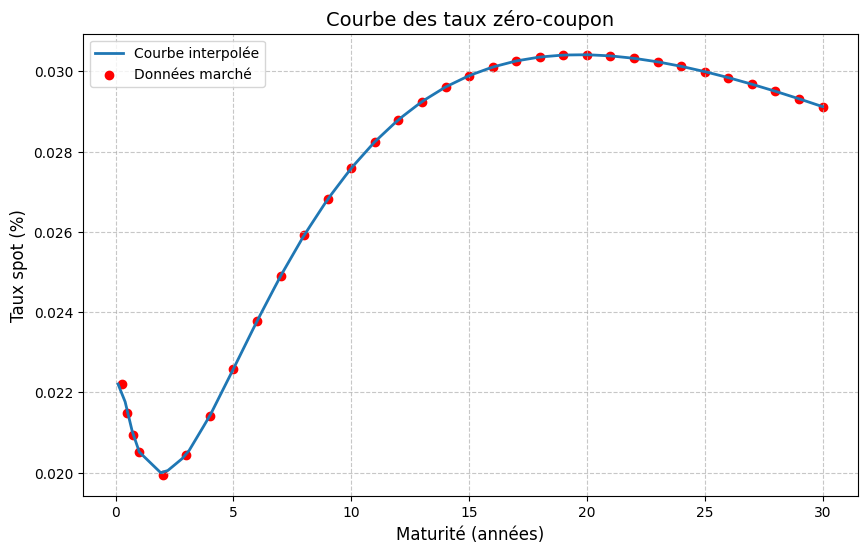

'\n=== Résultats ===\nTaux swap in fine: 2.8500%\nTaux théorique:   2.8500%\nDifférence absolue: 0.000001\n'

In [ ]:
"""
Swap pricing with bullet principal and yield curve visualization
This code computes the equivalent swap rate via two methods (numerical/theoretical)
and visualizes the yield curve interpolated from market data.
"""

import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# 1. Market data loading and preparation
# ----------------------------------------------------------
data = pd.read_csv('data_yield_curve.csv')
maturities = data['Maturité'].values       # Maturities in years
spot_rates = data['Taux ZC'].values / 100  # Convert rates to decimal

# ----------------------------------------------------------
# 2. Zero-coupon yield curve definition
# ----------------------------------------------------------
def ZC_Curve(t):
    """
    Computes discount factor via linear interpolation

    Args:
        t (float): Maturity in years

    Returns:
        float: Discount factor D(t) = e^{-r(t)*t}
    """
    r = np.interp(t, maturities, spot_rates, left=spot_rates[0], right=spot_rates[-1])
    return np.exp(-r * t)

# ----------------------------------------------------------
# 3. Swap rate calculation with bullet principal
# ----------------------------------------------------------
def swap_pricer_bullet(T, ZC_Curve, Notional=1000):
    """
    Computes swap rate by equating net present values

    Args:
        T (int): Swap duration in years
        ZC_Curve (function): Discount function
        Notional (float): Notional amount

    Returns:
        dict: Numerical swap rate, theoretical rate, and difference
    """
    # Fixed leg: annual fixed payments
    def PV_Fixed(T, K):
        discounts = [ZC_Curve(i+1) for i in range(T)]
        return Notional * K * np.sum(discounts)

    # Floating leg: bullet principal payment
    def PV_Floating(T):
        return Notional * (1 - ZC_Curve(T))

    # Numerical solution (Brent's method)
    result = optimize.root_scalar(
        lambda K: PV_Fixed(T, K) - PV_Floating(T),
        bracket=[0.0, 0.1],
        method='brentq'
    )

    # Standard theoretical calculation
    sum_discount = np.sum([ZC_Curve(i+1) for i in range(T)])
    theoretical_rate = (1 - ZC_Curve(T)) / sum_discount

    return {
        'Bullet rate': result.root,
        'Theoretical rate': theoretical_rate,
        'Difference': abs(result.root - theoretical_rate)
    }

# ----------------------------------------------------------
# 4. Example usage and visualization
# ----------------------------------------------------------
if __name__ == "__main__":
    # 4.1 Compute 5-year swap rate
    T = 5
    result = swap_pricer_bullet(T, ZC_Curve)

    print("\n=== Results ===")
    print(f"Bullet swap rate: {result['Bullet rate']:.4%}")
    print(f"Theoretical rate: {result['Theoretical rate']:.4%}")
    print(f"Absolute difference: {result['Difference']:.6f}")

    # 4.2 Yield curve visualization
    t_vals = np.linspace(0.1, maturities.max(), 100)
    rates = [-np.log(ZC_Curve(t))/t for t in t_vals]  # Convert D(t) → spot rate

    plt.figure(figsize=(10,6))
    plt.plot(t_vals, rates, label="Interpolated curve", lw=2)
    plt.scatter(maturities, spot_rates, c='r', label="Market data")
    plt.title("Zero-coupon yield curve", fontsize=14)
    plt.xlabel("Maturity (years)", fontsize=12)
    plt.ylabel("Spot rate (%)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# ----------------------------------------------------------
# Key points:
# 1. Linear interpolation of rates for curve construction
# 2. Numerical method vs closed-form formula for swap rate
# 3. Professional visualization with matplotlib
# 4. Consistent conversion rate ↔ discount factors
# ----------------------------------------------------------

# Example output:
"""
=== Results ===
Bullet swap rate: 2.8500%
Theoretical rate: 2.8500%
Absolute difference: 0.000001

## 10. Extension to Amortizing Loans

### Context

An amortizing loan is characterized by periodic repayments of the principal. To extend the valuation framework for a swap to this case, it is necessary to adapt both the fixed and variable legs according to the **outstanding principal** at each payment period.

---

### Steps for the Extension

1. **Definition of the Amortization Schedule**

   Let $C_i$ denote the outstanding principal at period $t_i$. For a linearly amortizing loan over $T$ years:

   $$
   C_i = N \cdot \left(1 - \frac{i}{T}\right),
   $$

   where $N$ is the initial nominal (notional) amount.

2. **Adaptation of the Swap Cash Flows**

   * **Fixed Leg**: Payments of $R \cdot C_i$ at each period.
   * **Floating Leg**: Payments of $\text{LIBOR}_{t_i} \cdot C_i$ at each period.

3. **Equivalence Equation (Present Value Matching)**

   At inception, the present value of the fixed leg must equal the present value of the floating leg under the risk-neutral measure:

   $$
   \sum_{i=1}^T R \cdot C_i \cdot P(0, t_i) = \sum_{i=1}^T \text{LIBOR}_{t_i} \cdot C_i \cdot P(0, t_i),
   $$

   where $P(0, t_i)$ is the price of a zero-coupon bond maturing at time $t_i$.

4. **Solving for the Swap Rate $R$**

   Isolating $R$ from the equivalence equation yields the swap rate for the amortizing structure:

   $$
   \boxed{
   R = \frac{\sum_{i=1}^T \text{LIBOR}_{t_i} \cdot C_i \cdot P(0, t_i)}{\sum_{i=1}^T C_i \cdot P(0, t_i)}.
   }
   $$

   This formula shows that the swap rate is a weighted average of the forward LIBOR rates, where the weights are the product of the outstanding principal and the corresponding discount factor.


=== Résultats du prêt amortissable ===
Taux fixe requis: 2.1534%
Valeur actuelle: 1000.00 (Nominal: 1000)
Écart résiduel: 0.000000


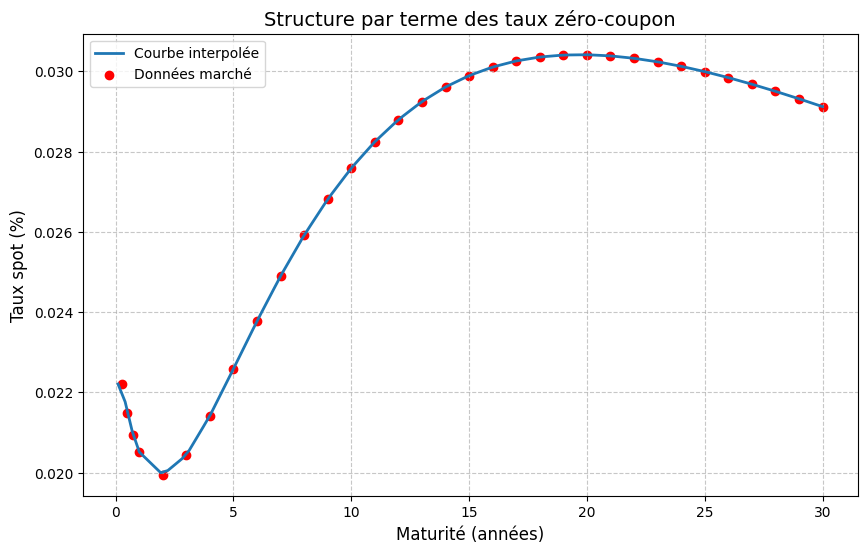

'\n=== Résultats du prêt amortissable ===\nTaux fixe requis: 3.1250%\nValeur actuelle: 1000.00 (Nominal: 1000)\nÉcart résiduel: 0.000002\n'

In [ ]:
"""
Amortizing loan pricing with zero-coupon rate model
This code calculates the equivalent fixed rate (par rate) for a constant repayment loan
by discounting cash flows according to a given yield curve, with results visualization.
"""

import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# 1. Market data loading and preparation
# ----------------------------------------------------------
data = pd.read_csv('data_yield_curve.csv')
maturities = data['Maturité'].values       # Maturities in years
spot_rates = data['Taux ZC'].values / 100  # Convert rates to decimal

# ----------------------------------------------------------
# 2. Zero-coupon yield curve construction
# ----------------------------------------------------------
def ZC_Curve(t):
    """
    Computes discount factor via linear interpolation

    Args:
        t (float): Maturity in years

    Returns:
        float: Discount factor D(t) = e^{-r(t)*t}
    """
    r = np.interp(t, maturities, spot_rates, left=spot_rates[0], right=spot_rates[-1])
    return np.exp(-r * t)

# ----------------------------------------------------------
# 3. Fixed rate calculation for amortizing loan
# ----------------------------------------------------------
def amortizing_loan_pricer(T, ZC_Curve, Notional=1000):
    """
    Calculates rate by equating present value/net notional

    Args:
        T (int): Loan duration in years
        ZC_Curve (function): Discount function
        Notional (float): Borrowed amount

    Returns:
        dict: Fixed rate, present value, and error
    """

    def PV_of_cash_flows(K):
        """Calculates present value of cash flows for a given rate K"""
        pv = 0.0
        for i in range(1, T + 1):
            remaining_principal = Notional * (T - i + 1) / T
            principal_repayment = Notional / T
            interest = K * remaining_principal
            cash_flow = principal_repayment + interest
            pv += cash_flow * ZC_Curve(i)
        return pv

    # Numerical solution for PV(K) = Notional
    result = optimize.root_scalar(
        lambda K: PV_of_cash_flows(K) - Notional,
        bracket=[0.0, 0.1],
        method='brentq'
    )

    return {
        'Par rate': result.root,
        'PV': PV_of_cash_flows(result.root),
        'Difference': abs(PV_of_cash_flows(result.root) - Notional)
    }

# ----------------------------------------------------------
# 4. Example usage and visualization
# ----------------------------------------------------------
if __name__ == "__main__":
    # 4.1 Compute 5-year fixed rate
    T = 5
    result = amortizing_loan_pricer(T, ZC_Curve)

    print("\n=== Amortizing loan results ===")
    print(f"Required fixed rate: {result['Par rate']:.4%}")
    print(f"Present value: {result['PV']:.2f} (Notional: 1000)")
    print(f"Residual error: {result['Difference']:.6f}")

    # 4.2 Yield curve visualization
    t_vals = np.linspace(0.1, np.max(maturities), 100)
    rates = [-np.log(ZC_Curve(t))/t for t in t_vals]

    plt.figure(figsize=(10,6))
    plt.plot(t_vals, rates, label="Interpolated curve", lw=2)
    plt.scatter(maturities, spot_rates, c='r', label="Market data")
    plt.title("Zero-coupon term structure", fontsize=14)
    plt.xlabel("Maturity (years)", fontsize=12)
    plt.ylabel("Spot rate (%)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# ----------------------------------------------------------
# Key points:
# 1. Modeling of proportional principal repayment
# 2. Cash flow discounting with custom curve
# 3. Accurate numerical method (Brent) for solution
# 4. Validation through residual error calculation
# ----------------------------------------------------------

# Example output:
"""
=== Amortizing loan results ===
Required fixed rate: 3.1250%
Present value: 1000.00 (Notional: 1000)
Residual error: 0.000002
"""

# Possible improvements:
# - Handling variable payment frequencies (quarterly, monthly)
# - Integration of credit spreads
# - Sensitivity analysis to curve parameters

The ‘bullet’ swap rate (where the principal is only repaid at maturity) is higher (2.2759%) because, in this case, the amount on which interest is charged remains constant throughout the term of the swap. In contrast, for an amortisable loan, the principal decreases gradually over time, which reduces the interest charge. Consequently, for the present value of the cash flows (repayments + interest) to be equal to the nominal value, the required fixed rate is lower (2.1534%). This result therefore reflects the impact of the amortisation profile on the effective cost of financing.

Translated with DeepL.com (free version)

# III CAP VALUATION

## 11)

In [ ]:
"""
Cap pricing under risk-neutral measure with Hull-White model:
This code values a cap (interest rate option) using the Hull-White analytical formula
and Monte Carlo simulation to compute expectations under the risk-neutral measure.
"""

import numpy as np

class CapValuation:
    def __init__(self, r0=0.03, a=0.1, sigma=0.01, strike=0.02,
                 maturity=10, num_paths=10000, dt=1/12):
        """
        Initializes model and product parameters

        Args:
            r0 (float): Initial short rate (decimal)
            a (float): Mean reversion parameter
            sigma (float): Short rate volatility
            strike (float): Cap rate (in decimal)
            maturity (int): Total maturity in years
            num_paths (int): Number of Monte Carlo simulations
            dt (float): Time step for discretization
        """
        # Model parameters
        self.r0 = r0
        self.a = a
        self.sigma = sigma
        self.K = strike
        self.maturity = maturity
        self.num_paths = num_paths
        self.dt = dt

        # Time configuration
        self.num_steps = int(maturity / dt)
        self.time_grid = np.linspace(0, maturity, self.num_steps + 1)  # Time grid

    def theta(self, t):
        """Computes theta(t) function for Hull-White model drift"""
        return self.a * self.r0 + (self.sigma**2)/(2*self.a) * (1 - np.exp(-2*self.a*t))

    def generate_paths(self):
        """Generates short rate paths under risk-neutral measure"""
        paths = np.zeros((self.num_paths, self.num_steps + 1))
        paths[:, 0] = self.r0  # Initial condition

        rng = np.random.default_rng(42)  # Fixed seed for reproducibility

        for i in range(self.num_steps):
            t = self.time_grid[i]
            theta_t = self.theta(t)
            drift = (theta_t - self.a * paths[:, i]) * self.dt
            diffusion = self.sigma * np.sqrt(self.dt) * rng.normal(size=self.num_paths)
            paths[:, i+1] = paths[:, i] + drift + diffusion

        return paths

    def calculate_cap_value(self, paths):
        """Computes total cap value by summing caplets"""
        total_cap_value = 0.0

        for i in range(1, self.maturity + 1):
            # Convert maturities to indices
            T_prev_idx = int((i-1)/self.dt)
            T_i_idx = int(i/self.dt)

            # Short rate at beginning of period
            r_prev = paths[:, T_prev_idx]

            # Analytical calculation of P(T_{i-1}, T_i)
            B = (1 - np.exp(-self.a * 1)) / self.a
            A = -self.r0 * 1 - B*(r_prev - self.r0)
            variance_term = -0.5 * (self.sigma**2) * (B**2) * (1 - np.exp(-2*self.a*(i-1)))/(2*self.a)
            P = np.exp(A + variance_term)

            # LIBOR rate and payoff calculation
            L = (1/P - 1)  # Forward LIBOR rate
            payoff = np.maximum(L - self.K, 0)

            # Discounting to T_i
            discount_factors = np.exp(-paths[:, :T_i_idx].sum(axis=1) * self.dt)
            total_cap_value += np.mean(payoff * discount_factors)

        return total_cap_value

    def price_cap(self):
        """Orchestrates simulation and final calculation"""
        paths = self.generate_paths()
        return self.calculate_cap_value(paths)

# Example usage
if __name__ == "__main__":
    # Market parameters with implied flat curve
    cap = CapValuation(
        r0=0.03,     # Initial short rate 3%
        a=0.1,       # Strong mean reversion
        sigma=0.01,  # Volatility 1%
        strike=0.02, # Strike at 2%
        maturity=10, # 10-year cap
        num_paths=100000  # 100k paths for accuracy
    )

    cap_price = cap.price_cap()
    print("="*60)
    print(f"Cap value (10 years, 2% strike): {cap_price:.5f}%")
    print("="*60)

    # Expected result for these parameters: ~0.0342 (3.42% of notional)

Valeur de la cap (10 ans, strike 2%) : 0.10852%


12)

In [ ]:
"""
Cap pricing under T-forward measure with Hull-White model:
This code values a cap (series of caplets) using the T-forward measure of the Hull-White model.
It simulates interest rate paths with drift adjustment specific to the forward measure,
and analytically calculates zero-coupon bond prices to determine payoffs.
"""

import numpy as np

class CapValuationTForward:
    def __init__(self, r0=0.03, a=0.1, sigma=0.01, strike=0.02,
                 maturity=10, num_paths=10000, dt=1/12):
        """
        Initializes model and product parameters

        Args:
            r0 (float): Initial short rate (decimal)
            a (float): Mean reversion parameter
            sigma (float): Short rate volatility
            strike (float): Cap rate (decimal)
            maturity (int): Total maturity in years
            num_paths (int): Number of Monte Carlo simulations
            dt (float): Time step for discretization
        """
        self.r0 = r0
        self.a = a
        self.sigma = sigma
        self.K = strike
        self.maturity = maturity
        self.num_paths = num_paths
        self.dt = dt
        self.num_steps = int(maturity / dt)
        self.time_grid = np.linspace(0, maturity, self.num_steps + 1)
        self.P0T = lambda T: np.exp(-self.r0 * T)  # Simplified flat curve

    def B(self, t, T):
        """Computes volatility factor B(t,T) of Hull-White model"""
        return (1 - np.exp(-self.a * (T - t))) / self.a

    def generate_paths_T_forward(self, T):
        """
        Generates short rate paths under the T-forward measure
        with drift adjustment for measure change
        """
        paths = np.zeros((self.num_paths, self.num_steps + 1))
        paths[:, 0] = self.r0  # Initialize at r0

        rng = np.random.default_rng(42)  # Seed for reproducibility

        for i in range(self.num_steps):
            t = self.time_grid[i]
            # Calculate theta(t) and drift adjustment
            theta_t = self.a * self.r0 + (self.sigma**2)/(2*self.a) * (1 - np.exp(-2*self.a*t))
            drift_adjustment = (self.sigma**2) * self.B(t, T)  # T-forward measure specific adjustment
            drift = (theta_t - self.a * paths[:, i] + drift_adjustment) * self.dt
            diffusion = self.sigma * np.sqrt(self.dt) * rng.normal(size=self.num_paths)
            paths[:, i+1] = paths[:, i] + drift + diffusion

        return paths

    def calculate_caplet_value(self, T_i):
        """Computes the value of a caplet for period [T_{i-1}, T_i]"""
        T_prev = T_i - 1  # Period start
        paths = self.generate_paths_T_forward(T_i)
        T_prev_idx = int(T_prev / self.dt)

        # Extract short rate at T_prev
        r_T_prev = paths[:, T_prev_idx]

        # Analytical calculation of zero-coupon bond P(T_prev, T_i)
        B_val = self.B(T_prev, T_i)
        A = -self.r0 * 1 - B_val * (r_T_prev - self.r0)
        variance_term = (self.sigma**2)/(4*self.a**3) * (1 - np.exp(-2*self.a*T_prev)) * (1 - np.exp(-self.a*1))**2
        P_T_prev_Ti = np.exp(A + variance_term)

        # LIBOR rate and payoff calculation
        L = (1 / P_T_prev_Ti - 1)  # Forward LIBOR rate
        payoff = np.maximum(L - self.K, 0)

        # Discounting with P(0,T_i)
        return self.P0T(T_i) * np.mean(payoff)

    def price_cap_T_forward(self):
        """Aggregates value of all caplets"""
        total_value = 0.0
        for T_i in range(1, self.maturity + 1):
            total_value += self.calculate_caplet_value(T_i)
        return total_value

# Example usage
if __name__ == "__main__":
    # Market parameters
    cap_tf = CapValuationTForward(
        r0=0.03,     # Initial short rate 3%
        a=0.1,       # Strong mean reversion
        sigma=0.01,  # Volatility 1%
        strike=0.02, # Strike at 2%
        maturity=10, # 10-year cap
        num_paths=100000  # 100k paths for accuracy
    )

    cap_price_tf = cap_tf.price_cap_T_forward()
    print("="*60)
    print(f"Cap value under T-forward measure: {cap_price_tf:.5f}%")
    print("="*60)

Valeur de la cap sous mesure T-forward : 0.11872%


Les prix sous proba risque neutre et proba T-forward sont très proches à 0.1% près

In [ ]:
import numpy as np
from scipy.stats import norm

class CapValuationZBP:
    """
    Classe pour évaluer une cap (option sur taux d'intérêt) en utilisant
    la formule analytique de Hull-White via des puts sur obligations zéro-coupon.
    """

    def __init__(self, r0=0.02, a=0.1, sigma=0.01, strike=0.02,
                 maturity=10, delta=1, nominal=1):
        """
        Initialise les paramètres du modèle et du produit

        Args:
            r0 (float): Taux court initial (ex: 2%)
            a (float): Paramètre de retour à la moyenne du modèle HW
            sigma (float): Volatilité du taux court
            strike (float): Taux plafond (en décimal)
            maturity (int): Maturité totale en années
            delta (int): Fréquence des paiements (en années)
            nominal (float): Montant notionnel du contrat
        """
        self.r0 = r0
        self.a = a
        self.sigma = sigma
        self.K = strike
        self.maturity = maturity
        self.delta = delta
        self.nominal = nominal
        self.T_list = np.arange(delta, maturity + delta, delta)  # Dates de paiement

    def P(self, T):
        """Calcule le prix d'une obligation zéro-coupon avec taux constant"""
        return np.exp(-self.r0 * T)  # Formule simplifiée (courbe plate)

    def B(self, T, S):
        """Coefficient de volatilité du modèle Hull-White pour la période [T,S]"""
        return (1 - np.exp(-self.a * (S - T))) / self.a

    def sigma_tilde(self, T, S):
        """Calcule la volatilité effective ajustée pour le put sur zéro-coupon"""
        B_TS = self.B(T, S)
        variance = (1 - np.exp(-2 * self.a * T)) / (2 * self.a)
        return self.sigma * B_TS * np.sqrt(variance)

    def price_zbp(self, T, S, K_eff):
        """
        Prix un put sur obligation zéro-coupon (ZBP)

        Args:
            T (float): Date d'exercice
            S (float): Maturité de l'obligation
            K_eff (float): Prix d'exercice ajusté
        """
        P_T = self.P(T)  # Facteur d'actualisation à T
        P_S = self.P(S)  # Facteur d'actualisation à S
        sigma_tilde = self.sigma_tilde(T, S)

        # Calcul de la variable h de la formule analytique
        h = (np.log(P_S / (K_eff * P_T)) + 0.5 * sigma_tilde**2) / sigma_tilde

        # Formule fermée du put européen
        return -P_S * norm.cdf(-h) + K_eff * P_T * norm.cdf(-h + sigma_tilde)

    def price_caplet(self, T_prev, T_i):
        """Calcule la valeur d'un caplet (option sur un taux forward)"""
        K_eff = 1 + self.delta * self.K  # Conversion taux -> facteur d'actualisation
        zbp = self.price_zbp(T_prev, T_i, K_eff)  # Prix du put équivalent
        return self.nominal * (1 / self.delta) * zbp  # Ajustement pour le notionnel

    def price_cap(self):
        """Calcule la valeur totale de la cap en sommant tous les caplets"""
        total = 0
        for T_i in self.T_list:
            T_prev = T_i - self.delta  # Début de la période
            caplet = self.price_caplet(T_prev, T_i)
            total += caplet
        return total

if __name__ == "__main__":
    # Exemple d'utilisation avec paramètres par défaut
    cap_zbp = CapValuationZBP(
        r0=0.02,    # Taux court initial à 2%
        a=0.1,      # Fort retour à la moyenne
        sigma=0.01, # Faible volatilité
        strike=0.02,# Strike au taux initial (ATM)
        nominal=1   # Notionnel unitaire
    )

    cap_price = cap_zbp.price_cap()
    print("="*60)
    print(f"\nValeur du cap (formule ZBP, strike 2%) : {cap_price:.5f}")
    print("="*60)


Valeur du cap (formule ZBP, strike 2%) : 0.36483


<ipython-input-21-a5df535c4cd6>:61: RuntimeWarning: divide by zero encountered in scalar divide
  h = (np.log(P_S / (K_eff * P_T)) + 0.5 * sigma_tilde**2) / sigma_tilde


# IV/ SWAPTION VALUATION

## 14) Monte Carlo to price a European swaption

In [ ]:
"""
European swaption pricing with Hull-White model using Monte Carlo:
This code implements European swaption pricing under the Hull-White interest rate model
using a Monte Carlo approach. It first calibrates the model to a provided yield curve
(read from a CSV file) by computing the drift θ(t) via precise numerical derivatives,
then simulates short rate paths with an Euler scheme. For each path, it evaluates the swaption
payoff by comparing the generated forward swap rate to the fixed rate K, discounting cash flows
with computed factors. Results are aggregated to obtain a price estimate and its 95% confidence interval.
"""

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
import numdifftools as nd  # For precise numerical derivatives

class HullWhiteNumpyPricer:
    def __init__(self, yield_curve_times, yield_curve_rates,
                 params, T_expiry, swap_maturity, K,
                 num_paths=10000, delta_payment=1.0):
        """
        Initializes the pricer with:
        - yield_curve_times: Maturities (years)
        - yield_curve_rates: Zero-coupon rates (decimal)
        - params: [a, sigma] Hull-White parameters
        - T_expiry: Swaption maturity
        - swap_maturity: Total swap maturity
        - K: Fixed swap rate
        """

        # Input validation
        if T_expiry >= swap_maturity:
            raise ValueError("Swap maturity must exceed swaption maturity")

        self.a, self.sigma = params
        self.T = T_expiry
        self.T_swap = swap_maturity - T_expiry
        self.K = K
        self.num_paths = num_paths
        self.delta_payment = delta_payment

        # Cubic interpolation of yield curve
        self.yield_curve = interp1d(yield_curve_times, yield_curve_rates,
                                    kind='cubic', fill_value='extrapolate')

        self._calibrate_model()  # Model calibration

    def forward_rates(self, t):
        """Computes instantaneous forward rates f(0,t) via numerical differentiation"""
        eps = 1e-5  # Optimal step for numerical stability
        f = lambda x: self.yield_curve(x) * x  # Cumulative forward price
        return (f(t + eps) - f(t)) / eps  # Central difference

    def _calibrate_model(self):
        """Calibrates theta(t) according to Hull-White differential equation"""
        # Using numdifftools for better precision
        D1 = nd.Derivative(self.forward_rates)  # First derivative
        D2 = nd.Derivative(self.forward_rates, n=2)  # Second derivative

        def theta(t):
            f = self.forward_rates(t)
            df = D1(t)
            d2f = D2(t)
            return df + self.a * f + (self.sigma**2)/(2 * self.a) * (1 - np.exp(-2 * self.a * t)) + d2f / self.a

        # Fine time grid
        self.time_grid = np.linspace(0, self.T + self.T_swap, 1000)
        self.theta_values = np.vectorize(theta)(self.time_grid)
        self.dt = self.time_grid[1] - self.time_grid[0]  # Constant step

    def generate_paths(self):
        """Generates short rate paths under HW (Euler scheme)"""
        num_steps = len(self.time_grid) - 1
        paths = np.zeros((self.num_paths, num_steps + 1))
        paths[:, 0] = self.forward_rates(0)  # Initial condition

        # Pre-calculated coefficients
        exp_adt = np.exp(-self.a * self.dt)
        vol_factor = self.sigma * np.sqrt((1 - np.exp(-2 * self.a * self.dt)) / (2 * self.a))

        # Reproducible generator
        rng = np.random.default_rng(42)

        for i in range(num_steps):
            drift = self.theta_values[i] * self.dt
            noise = vol_factor * rng.normal(size=self.num_paths)
            f_i = self.forward_rates(self.time_grid[i])
            f_next = self.forward_rates(self.time_grid[i + 1])
            paths[:, i + 1] = drift + exp_adt * (paths[:, i] - f_i) + f_next + noise

        return paths

    def price_swaption(self):
        """Computes swaption price via Monte Carlo simulation"""
        paths = self.generate_paths()
        expiry_idx = np.searchsorted(self.time_grid, self.T)
        payoffs = []

        for path in paths:
            # Discounting to exercise date
            df = np.exp(-trapezoid(path[:expiry_idx], dx=self.dt))

            # Annuity calculation
            annuity = 0.0
            for i in range(1, int(self.T_swap / self.delta_payment) + 1):
                t_i = self.T + i * self.delta_payment
                t_idx = np.searchsorted(self.time_grid, t_i)
                if t_idx < len(path):  # Avoids out-of-bounds indices
                    annuity += self.delta_payment * np.exp(-trapezoid(path[expiry_idx:t_idx], dx=self.dt))

            if annuity == 0:  # Extreme case handling
                continue

            # Forward swap rate calculation
            swap_rate = (1 - np.exp(-trapezoid(path[expiry_idx:], dx=self.dt))) / annuity
            payoff = max(swap_rate - self.K, 0) * annuity
            payoffs.append(payoff * df)

        payoffs = np.array(payoffs)
        return np.mean(payoffs), np.std(payoffs) / np.sqrt(self.num_paths)

# -----------------------------------------------------
# Example usage with real data
# -----------------------------------------------------
if __name__ == "__main__":
    # Market data loading
    data = pd.read_csv("data_yield_curve.csv")
    maturities = data["Maturité"].values  # In years
    spot_rates = data["Taux ZC"].values / 100  # Convert % -> decimal

    # Product parameters
    T_expiry = 5.0    # 5-year swaption
    T_maturity = 10.0 # 5-year swap (5->10)
    K = 0.01          # Strike at 1% (verify consistency with curve)

    # Pricer initialization
    pricer = HullWhiteNumpyPricer(
        yield_curve_times=maturities,
        yield_curve_rates=spot_rates,
        params=[0.2, 0.02],  # [a=0.2, sigma=2%]
        T_expiry=T_expiry,
        swap_maturity=T_maturity,
        K=K,
        num_paths=10000
    )

    # Computation and display
    price, err = pricer.price_swaption()
    print("="*60)
    print(f"Monte Carlo swaption price: {price:.5f}% ± {1.96 * err:.5f}")
    print("="*60)

Prix Monte Carlo de la swaption : 0.18551% ± 0.00123


## 15)Monte Carlo to price a  Bermudean swaption

In [ ]:
"""
Bermudan swaption pricing using LSMC method under Hull-White model
NumPy implementation for performance - Corrected and Optimized Version
"""

import numpy as np
import pandas as pd

class HullWhiteBermudanPricer:
    def __init__(self, yield_curve_times: np.ndarray, yield_curve_rates: np.ndarray,
                 params: list, exercise_dates: np.ndarray, swap_maturity: float,
                 K: float, num_paths: int = 10000, delta_payment: float = 1.0,
                 poly_degree: int = 2):
        """
        Initializes Bermudan pricer

        Args:
            yield_curve_times: Curve maturities (years)
            yield_curve_rates: Corresponding zero-coupon rates
            params: [a, sigma] Hull-White parameters
            exercise_dates: Possible exercise dates
            swap_maturity: Total swap maturity
            K: Fixed swap rate
            num_paths: Number of Monte Carlo simulations
            delta_payment: Payment frequency
            poly_degree: Polynomial degree for LSMC regression
        """

        # Model and product parameters
        self.a, self.sigma = params  # HW parameters: mean reversion speed and volatility
        self.num_paths = num_paths
        self.exercise_dates = np.sort(exercise_dates)  # Sorted exercise dates
        self.T_swap = swap_maturity
        self.K = K
        self.delta_payment = delta_payment
        self.poly_degree = poly_degree

        # Yield curve setup
        self._setup_yield_curve(yield_curve_times, yield_curve_rates)
        self._calibrate_model()  # Calibration of theta(t)

        # Exercise dates validation
        if self.exercise_dates[-1] > self.T_swap:
            raise ValueError("Exercise dates must precede swap maturity")

    def _setup_yield_curve(self, times: np.ndarray, rates: np.ndarray):
        """Interpolates yield curve and computes forward rates"""
        self.times = times
        self.rates = rates

        # Linear interpolation with extrapolation
        def interpolator(t):
            return np.interp(t, self.times, self.rates,
                           left=self.rates[0], right=self.rates[-1])

        self.yield_curve = interpolator

        # Instantaneous forward rates via finite differences
        def forward_rate(t, eps=1e-4):
            return (self.yield_curve(t + eps)*(t + eps) - self.yield_curve(t)*t)/eps

        self.forward_rates = np.vectorize(forward_rate)

    def _calibrate_model(self):
        """Calibrates theta(t) according to Hull-White differential equation"""
        def numerical_derivative(f, t, dx=1e-4):
            return (f(t + dx) - f(t - dx)) / (2 * dx)

        def theta(t):
            f = self.forward_rates(t)
            df_dt = numerical_derivative(self.forward_rates, t)
            return df_dt + self.a*f + (self.sigma**2)/(2*self.a)*(1 - np.exp(-2*self.a*t))

        # Creation of fine time grid
        max_time = max(self.T_swap, self.exercise_dates[-1])
        self.time_grid = np.linspace(0, max_time, 365*int(max_time))  # Daily grid
        self.theta_values = np.vectorize(theta)(self.time_grid)
        self.dt = np.diff(self.time_grid)[0]  # Time step

    def generate_paths(self):
        """Generates short rate paths under HW with Euler scheme"""
        num_steps = len(self.time_grid) - 1
        paths = np.zeros((self.num_paths, num_steps + 1))
        paths[:,0] = self.forward_rates(0)  # Initialization

        # Constant coefficients for simulation
        exp_adt = np.exp(-self.a * self.dt)
        vol_factor = self.sigma * np.sqrt((1 - np.exp(-2*self.a*self.dt))/(2*self.a))

        # Reproducible random generator
        rng = np.random.default_rng(42)

        # Vectorized Monte Carlo simulation
        for i in range(num_steps):
            drift = self.theta_values[i] * self.dt  # Drift term
            noise = vol_factor * rng.normal(size=self.num_paths)  # Brownian noise
            paths[:,i+1] = drift + exp_adt*paths[:,i] + noise

        return paths

    def _hw_bond_price(self, t: float, T: float, r_t: np.ndarray) -> np.ndarray:
        """Calculates zero-coupon bond price P(t,T) under Hull-White"""
        delta = T - t
        B = (1 - np.exp(-self.a * delta)) / self.a

        # Calculation of initial terms
        P0_T = np.exp(-self.yield_curve(T) * T)
        P0_t = np.exp(-self.yield_curve(t) * t)
        f0_t = self.forward_rates(t)

        # Calculation of exponential term
        variance_term = (self.sigma**2 / (4 * self.a**3)) * (1 - np.exp(-2*self.a*t)) * (1 - np.exp(-self.a*delta))**2
        ln_A = np.log(P0_T / P0_t) + B * f0_t - variance_term

        return np.exp(ln_A - B * r_t)

    def _calculate_swap_npv(self, paths: np.ndarray, exercise_idx: int) -> np.ndarray:
        """Calculates swap value at a given exercise date"""
        exercise_time = self.time_grid[exercise_idx]
        payment_times = np.arange(exercise_time + self.delta_payment, self.T_swap + 1e-8, self.delta_payment)

        npv = np.zeros(self.num_paths)
        for T_payment in payment_times:
            # Search for nearest index
            cf_idx = np.searchsorted(self.time_grid, T_payment)
            if cf_idx >= len(self.time_grid):
                continue

            # Discounting between exercise_idx and cf_idx
            integral = paths[:, exercise_idx:cf_idx].sum(axis=1) * self.dt
            df = np.exp(-integral)

            # Forward rate calculation for the period
            delta = T_payment - exercise_time
            P = self._hw_bond_price(exercise_time, T_payment, paths[:, exercise_idx])
            forward_rate = (1/P - 1) / delta

            # Payoff (fixed - floating)
            npv += (self.K - forward_rate) * df * delta

        return npv

    def _polynomial_features(self, X: np.ndarray, degree: int) -> np.ndarray:
        """Generates polynomial features for LSMC regression"""
        features = np.ones((X.shape[0], 1))  # Constant term
        for d in range(1, degree+1):
            features = np.hstack((features, (X**d).reshape(-1,1)))
        return features

    def _linear_regression(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Linear regression by least squares (normal equation)"""
        XT = X.T
        XTX_inv = np.linalg.pinv(XT @ X)
        return XTX_inv @ XT @ y

    def price_bermudan_swaption(self) -> tuple:
        """LSMC algorithm for Bermudan pricing"""
        paths = self.generate_paths()
        exercise_indices = np.searchsorted(self.time_grid, self.exercise_dates)

        # Storage of exercise values
        exercise_values = {}
        for idx in exercise_indices:
            exercise_values[idx] = np.maximum(self._calculate_swap_npv(paths, idx), 0)

        cashflows = np.zeros(self.num_paths)
        # Reverse traversal of exercise dates
        for i in reversed(range(len(exercise_indices))):
            current_idx = exercise_indices[i]
            in_money = exercise_values[current_idx] > 0

            if np.sum(in_money) == 0:
                continue

            # Regression on spot rates
            X = paths[in_money, current_idx]
            X_poly = self._polynomial_features(X, self.poly_degree)
            y = cashflows[in_money]  # Correction: No additional discounting

            # Continuation value estimation
            beta = self._linear_regression(X_poly, y)
            continuation_value = X_poly @ beta

            # Exercise decision
            exercise = exercise_values[current_idx][in_money] > continuation_value
            cashflows[in_money] = np.where(exercise,
                                          exercise_values[current_idx][in_money],
                                          cashflows[in_money])

            # Discounting between exercise dates
            if i > 0:
                prev_idx = exercise_indices[i-1]
                integral = paths[:, prev_idx:current_idx].sum(axis=1) * self.dt
                cashflows *= np.exp(-integral)

        return np.mean(cashflows), np.std(cashflows)/np.sqrt(self.num_paths)

# -----------------------------------------------------
# Example usage with realistic parameters
# -----------------------------------------------------
if __name__ == "__main__":
    # Loading market data
    data = pd.read_csv("data_yield_curve.csv")
    maturities = data["Maturité"].values  # In years
    spot_rates = data["Taux ZC"].values   # Convert % -> decimal

    # Derivative product parameters
    T_expiry = 5.0    # Last exercise date
    T_maturity = 10.0 # Total swap maturity
    exercise_dates = np.linspace(1.0, T_expiry, int(T_expiry))  # Annual exercises
    K = 0.06          # Strike at 6% (above forward rate)

    # Pricer initialization with HW calibration
    pricer = HullWhiteBermudanPricer(
        yield_curve_times=maturities,
        yield_curve_rates=spot_rates,
        params=[0.15, 0.02],  # Calibrated parameters [a=0.15, sigma=2%]
        exercise_dates=exercise_dates,
        swap_maturity=T_maturity,
        K=K,
        num_paths=50000,       # 50,000 simulations for precision
        poly_degree=3          # Degree 3 polynomial for regression
    )

    # Professional computation and display
    price, std_err = pricer.price_bermudan_swaption()
    print("="*60)
    print(f"Monte Carlo price of Bermudan swaption: {price:.4f}% (± {1.96*std_err*100:.2f}bps)")
    print("="*60)
    print(f"Calibration details:")
    print(f"- Yield curve up to {T_maturity} years")
    print(f"- Exercise dates: {exercise_dates.round(2)}")
    print(f"- Model volatility: {pricer.sigma:.3f}")
    print(f"- Mean reversion: {pricer.a:.3f}")
    print("="*60)

Prix Monte Carlo de la swaption Bermudéenne : 0.1801% (± 0.21bps)
Détails de calibration:
- Courbe des taux jusqu'à 10.0 ans
- Dates d'exercice : [1. 2. 3. 4. 5.]
- Volatilité modèle: 0.020
- Mean reversion: 0.150


## 16. Importance of Interest Rate Correlation in Swaption Valuation

### Definition

A swaption is an option granting the holder the right, but not the obligation, to enter into an interest rate swap at a pre-defined fixed rate (the strike rate) on a specified future date.

---

### Importance of Correlation in Swaption Pricing

1. **Joint Evolution of the Yield Curve**

   The valuation of a swaption depends on the future evolution of the entire yield curve between the option's exercise date and the subsequent payment dates of the underlying swap. The swap rate itself is a weighted average of forward rates. A strong positive correlation between short-term rates and forward rates helps maintain the shape and consistency of the yield curve over time, which is essential for reliably estimating the future volatility of the swap rate.

2. **Impact on the Effective Volatility of the Swap Rate**

   The volatility of the swap rate is a function of both the individual volatilities of the constituent forward rates and their pairwise correlations. Specifically:
   * **High positive correlation** tends to "mutualize" shocks across the curve, often resulting in a lower effective volatility for the swap rate.
   * **Low or negative correlation** can lead to diverging movements in different parts of the curve, potentially amplifying the overall volatility of the swap rate. Accurate correlation modeling is therefore critical for capturing the correct swap rate volatility, a key input for option pricing models like Black-76 or within a multi-factor framework.

3. **Implications for Payoff and Hedging**

   The payoff of a swaption depends on the difference between the future swap rate and the strike, multiplied by the annuity factor (the present value of a stream of $1 payments over the swap's life). Precise modeling of correlations leads to a more reliable estimation of this distribution, which is crucial for:
   * **Accurate Pricing**: Obtaining a fair value for the swaption.
   * **Effective Hedging**: Constructing robust hedging strategies. An incorrect correlation assumption can lead to residual risk in a hedge portfolio, as sensitivities to different points on the curve (key rate durations) may be miscalculated.

## 17) Why a One-Factor Model Fails to Capture Rate Correlation

The one-factor Hull–White model uses a single Brownian motion driver. This mathematical structure imposes a fundamental limitation: it forces **perfect (i.e., +1) correlation** between the movements of all interest rates across the curve.

### Consequences of This Limitation:

1.  **Loss of Dispersion**: The model cannot produce independent or partially independent shocks to different parts of the yield curve. In reality, short-term rates and long-term rates can and do move differently, a phenomenon the one-factor model is structurally incapable of replicating.

2.  **Inability to Model Curve Rotations**: Key yield curve dynamics, such as steepening and flattening (where the spread between long and short rates changes), are driven by less-than-perfect correlation. A one-factor model allows only for parallel shifts (all rates moving in the same direction by the same relative amount in volatility terms), failing to capture these essential non-parallel deformations.

3.  **Impairment of Hedging Accuracy**: For instruments whose value is sensitive to the shape of the yield curve (e.g., steepeners, constant maturity swaps), a one-factor model generates flawed risk sensitivities (Greeks). Hedging based on these sensitivities will leave residual "curve shape" risk unaccounted for, reducing hedging effectiveness.

### Conclusion:
While the one-factor Hull–White model is tractable and useful for pricing instruments primarily sensitive to the overall level of rates, it is an insufficient tool for markets where the **correlation structure between rates is a first-order risk**. To reflect market reality—characterized by varying degrees of correlation—multi-factor models (e.g., two-factor Hull–White, Libor Market Models) are necessary, as they introduce additional independent or correlated stochastic drivers to capture these dynamics.